### Lendo as bases de treino e teste

In [1]:
import pickle

In [2]:
with open('../Bases/credit_data.pkl', 'rb') as file:
    X_credit_treinamento, X_credit_teste, y_credit_treinamento, y_credit_teste = pickle.load(file)

In [3]:
X_credit_treinamento.shape, y_credit_treinamento.shape

((1500, 3), (1500,))

In [4]:
X_credit_teste.shape, y_credit_teste.shape

((500, 3), (500,))

### Arvore de decisao - 98,2%

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
arvore_credit_data = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_credit_data.fit(X_credit_treinamento, y_credit_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [7]:
previsoes = arvore_credit_data.predict(X_credit_teste)

#### Metricas

In [8]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [9]:
accuracy_score(y_credit_teste, previsoes)

0.982

In [10]:
confusion_matrix(y_credit_teste, previsoes)

array([[430,   6],
       [  3,  61]], dtype=int64)

In [11]:
from yellowbrick.classifier import ConfusionMatrix

0.982

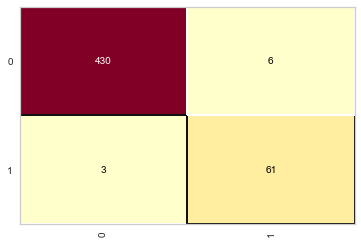

In [12]:
cm = ConfusionMatrix(arvore_credit_data)
cm.fit(X_credit_treinamento, y_credit_treinamento)
cm.score(X_credit_teste, y_credit_teste)

In [13]:
print(classification_report(y_credit_teste, previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



In [15]:
import matplotlib.pyplot as plt
from sklearn import tree

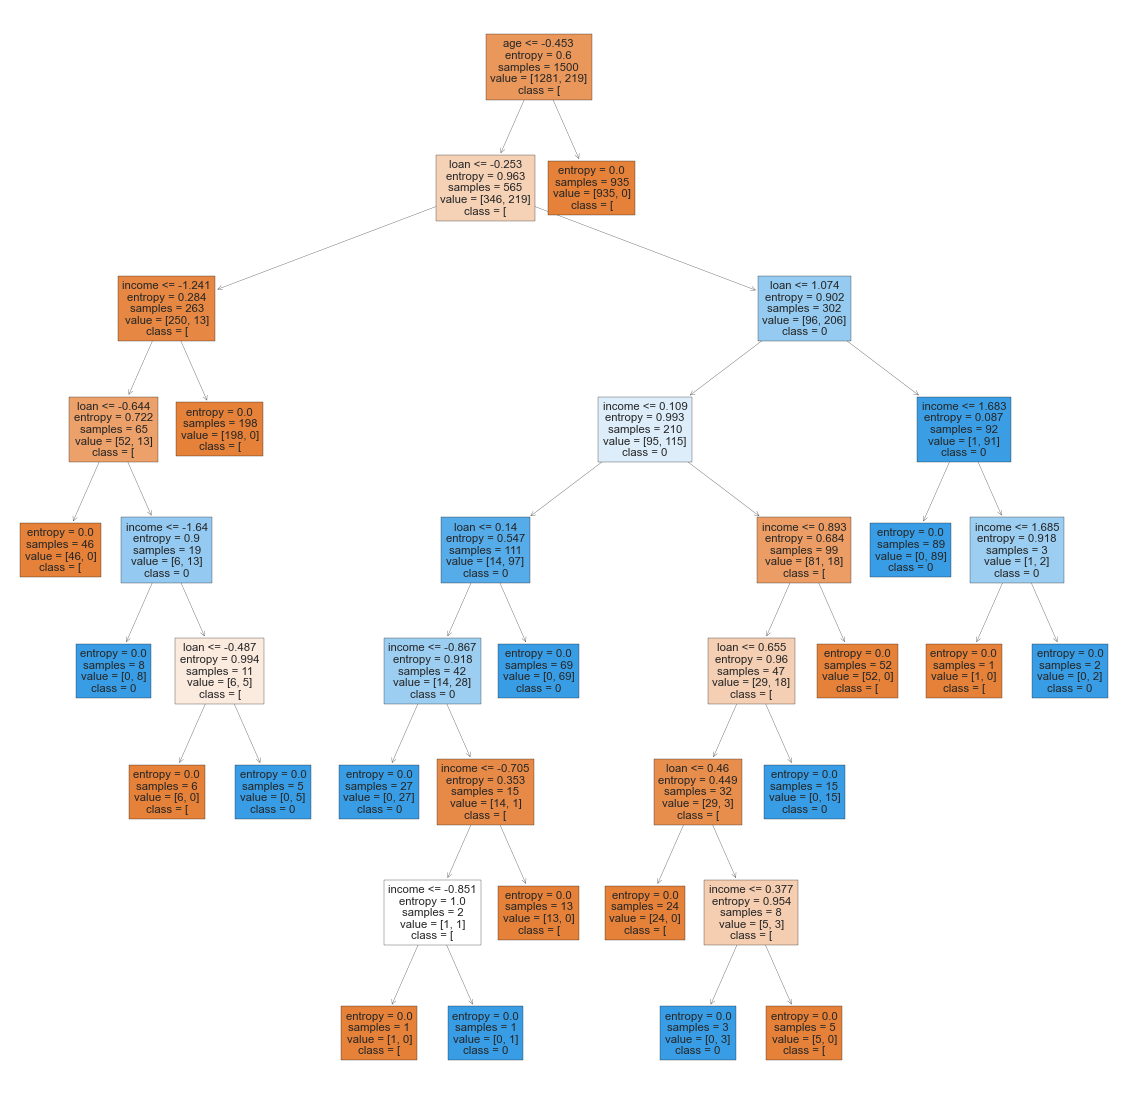

In [17]:
from sklearn import tree
previsores = ['income', 'age', 'loan']
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20,20))
tree.plot_tree(arvore_credit_data, class_names=str(arvore_credit_data.classes_), filled=True, feature_names=previsores);